In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def N(x):
    return norm.cdf(x, loc=0, scale=1)
def Np(x):
    return norm.pdf(x, loc=0, scale=1)

In [3]:
def d1(S, K, r, s, T):
    return (np.log(S/K)+(r+s**2/2)*T)/(s*np.sqrt(T))
def d2(S, K, r, s, T):
    return d1(S, K, r, s, T) - s*np.sqrt(T)

In [4]:
def C(S, K, r, s, T):
    return S*N(d1(S, K, r, s, T)) - K*np.exp(-r*T)*N(d2(S, K, r, s, T))
def P(S, K, r, s, T):
    return K*np.exp(-r*T)*N(-d2(S, K, r, s, T)) - S*N(-d1(S, K, r, s, T))

In [5]:
def deltaC(S, K, r, s, T):
    return N(d1(S, K, r, s, T))
def deltaP(S, K, r, s, T):
    return -N(-d1(S, K, r, s, T))
    
def gammaC(S, K, r, s, T):
    return Np(d1(S, K, r, s, T))/(S*s*np.sqrt(T))
def gammaP(S, K, r, s, T):
    return gammaC(S, K, r, s, T)
    
def vegaC(S, K, r, s, T):
    return S*Np(d1(S, K, r, s, T))*np.sqrt(T)
def vegaP(S, K, r, s, T):
    return vegaC(S, K, r, s, T)
    
def thetaC(S, K, r, s, T):
    return -S*Np(d1(S, K, r, s, T))*s/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*N(d2(S, K, r, s, T))
def thetaP(S, K, r, s, T):
    return -S*Np(d1(S, K, r, s, T))*s/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*N(-d2(S, K, r, s, T))

def rhoC(S, K, r, s, T):
    return K*T*np.exp(-r*T)*N(d2(S, K, r, s, T)) 
def rhoP(S, K, r, s, T):
    return -K*T*np.exp(-r*T)*N(-d2(S, K, r, s, T)) 

### 1. Vertical Spread

In [6]:
def vspread(S, K1, K2, r, s1, s2, T):
    return -C(S, K1, r, s1, T) + C(S, K2, r, s2, T)

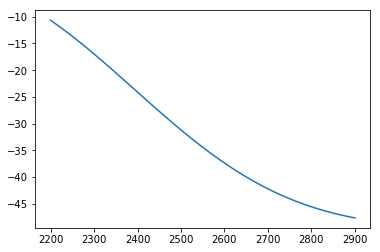

In [7]:
S = 2550
r = 0.015775
@interact(K1=widgets.FloatSlider(min=2400, max=2700, value=2550), 
          K2=widgets.FloatSlider(min=2400, max=2700, value=2600), 
          s1=widgets.FloatSlider(min=0, max=100, value=13), 
          s2=widgets.FloatSlider(min=0, max=100, value=12),
          T=widgets.FloatSlider(min=0, max=2, value=1))

def plot_mtm(K1, K2, s1, s2, T):
    S = np.linspace(2200, 2900,100)
    plt.plot(S, vspread(S, K1, K2, r, s1/100, s2/100, T))

### 2. Butterfly

In [8]:
def straddle(S, K, r, s, T):
    return C(S, K, r, s, T) + P(S, K, r, s, T)

def strangle(S, K1, K2, r, s, T):
    return C(S, K2, r, s, T) + P(S, K1, r, s, T)

#def butterfly(S, K, e, r, s, T):
#    return -straddle(S, S, r, s, T) + strangle(S, K-e, K+e, r, s, T) 

def butterfly(S, K, e, r, s, T):
    return C(S, K-e, r, s, T) - 2*C(S, K, r, s, T) +C(S, K+e, r, s, T)

def d2C_dK2(S, K, e, r, s, T):
    return butterfly(S, K, e, r, s, T)/e**2

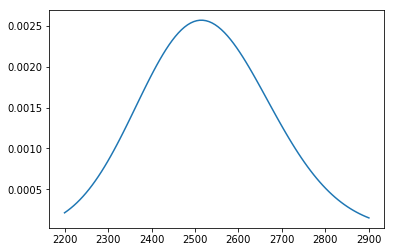

In [9]:
S = 2550
r = 0.015775
@interact(K=widgets.FloatSlider(min=2400, max=2700, value=2550),
          e=widgets.FloatSlider(min=0, max=1000, value=100),
          s=widgets.FloatSlider(min=0, max=10, value=6),
          T=widgets.FloatSlider(min=0, max=2, value=1))

def plot_mtm(K, e, s, T):
    S = np.linspace(2200, 2900,100)
    plt.plot(S, d2C_dK2(S, K, e/100, r, s/100, T))

### 3. Risk Reversal

In [10]:
def riskreversal(S, K1, K2, r, s, T):
    return C(S, K1, r, s, T) - P(S, K2, r, s, T)

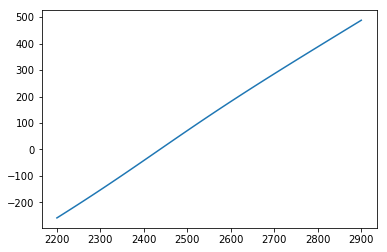

In [11]:
S = 2550
r = 0.015775
@interact(K1=widgets.FloatSlider(min=2400, max=2700, value=2450),
          K2=widgets.FloatSlider(min=2400, max=2700, value=2500),
          s=widgets.FloatSlider(min=0, max=10, value=6),
          T=widgets.FloatSlider(min=0, max=2, value=1))

def plot_mtm(K1, K2, s, T):
    S = np.linspace(2200, 2900,100)
    plt.plot(S, riskreversal(S, K1, K2, r, s/100, T))

### 4. Condor

In [12]:
#def condor(S, e, m, r, s, T):
#    return -C(S, S-(e+m), r, s, T) + C(S, S-e, r, s, T) - C(S, S+e, r, s, T) + C(S, S+(e+m), r, s, T)

def condor(S, e, m, r, s, T):
    return strangle(S, S-(e+m), S+(e+m), r, s, T) - strangle(S, S-e, S+e, r, s, T)

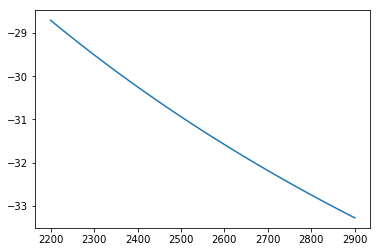

In [13]:
S = 2550
r = 0.015775
@interact(e=widgets.FloatSlider(min=0, max=500, value=50),
          m=widgets.FloatSlider(min=0, max=500, value=50),
          s=widgets.FloatSlider(min=0, max=10, value=6),
          T=widgets.FloatSlider(min=0, max=2, value=1))

def plot_mtm(e, m, s, T):
    S = np.linspace(2200, 2900,100)
    plt.plot(S, condor(S, e, m, r, s/100, T))

### 5. Calendar Spread

In [14]:
def calendarspread(S, K, r, s, T1, T2):
    return -C(S, K, r, s, T1) + C(S, K, r, s, T2) 

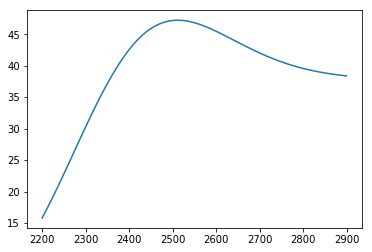

In [15]:
S = 2550
r = 0.015775
@interact(K=widgets.FloatSlider(min=2400, max=2700, value=2450),
          s=widgets.FloatSlider(min=0, max=10, value=6),
          T1=widgets.FloatSlider(min=0, max=3, value=1),
          T2=widgets.FloatSlider(min=0, max=3, value=2))

def plot_mtm(K, s, T1, T2):
    S = np.linspace(2200, 2900,100)
    plt.plot(S, calendarspread(S, K, r, s/100, T1, T2))

### 6. Plain Vanilla

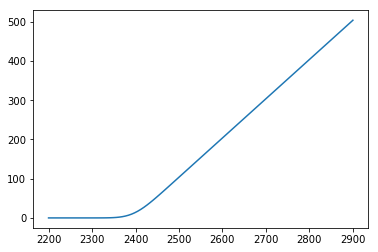

In [16]:
S = 2550
r = 0.015775
@interact(K=widgets.FloatSlider(min=2400, max=2700, value=2450),
          s=widgets.FloatSlider(min=0, max=100, value=6),
          T=widgets.FloatSlider(min=0, max=3, value=1))

def plot_mtm(K, s, T):
    S = np.linspace(2200, 2900,100)
    plt.plot(S, C(S, K, r, s/100, T))

### 7. Collar

In [17]:
def collar(S, K1, K2, r, s, T):
    return S - C(S, K1, r, s, T) + P(S, K2, r, s, T)

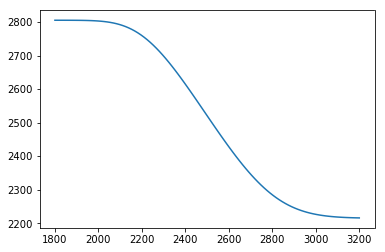

In [18]:
S = 2550
r = 0.015775
@interact(K1=widgets.FloatSlider(min=2000, max=3000, value=2250),
          K2=widgets.FloatSlider(min=2000, max=3000, value=2850),
          s=widgets.FloatSlider(min=0, max=100, value=6),
          T=widgets.FloatSlider(min=0, max=3, value=1))

def plot_mtm(K1, K2, s, T):
    S = np.linspace(1800, 3200,100)
    plt.plot(S, collar(S, K1, K2, r, s/100, T))

### 8. Delta

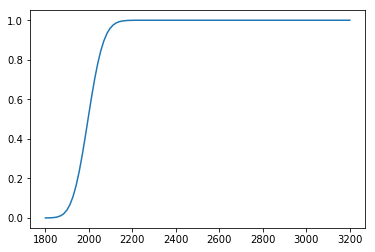

In [22]:
S = 2550
r = 0.015775
@interact(K=widgets.FloatSlider(min=2000, max=3000, value=2250),
          s=widgets.FloatSlider(min=0, max=200, value=6),
          T=widgets.FloatSlider(min=0, max=3, value=1))

def plot_mtm(K, s, T):
    S = np.linspace(1800, 3200,100)
    #plt.plot(S, deltaC(S, K, r, s/100, T))
    plt.plot(S, deltaC(S, K, r, s/100, T))